In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from models.cycle_gan_model_parallel import CycleGAN
from data import create_dataset, find_dataset_using_name
import argparse
import torch

In [3]:
device = torch.device(0)
device

device(type='cuda', index=0)

In [4]:
dataset_class = find_dataset_using_name('unaligned')
opt = argparse.Namespace()
opt.dataroot = '/fs/nexus-scratch/vla/datasets/maps'
opt.max_dataset_size = float('inf')
opt.input_nc = 3
opt.output_nc = 3
opt.direction = 'AtoB'
opt.phase = 'train'
opt.preprocess = 'resize_and_crop'
opt.load_size = 286
opt.crop_size = 256
opt.no_flip = False
opt.serial_batches = False

opt

Namespace(dataroot='/fs/nexus-scratch/vla/datasets/maps', max_dataset_size=inf, input_nc=3, output_nc=3, direction='AtoB', phase='train', preprocess='resize_and_crop', load_size=286, crop_size=256, no_flip=False, serial_batches=False)

In [5]:
dataset = dataset_class(opt)

In [6]:
len(dataset)

1096

In [7]:
dataset[0]

{'A': tensor([[[-0.2235, -0.2314, -0.2000,  ..., -0.3569, -0.3176, -0.3020],
          [-0.2157, -0.2078, -0.2078,  ..., -0.2471, -0.1294, -0.1608],
          [-0.2078, -0.2000, -0.2000,  ..., -0.2392, -0.4275, -0.5765],
          ...,
          [-0.8667, -0.8588, -0.8431,  ..., -0.1451, -0.3490, -0.5922],
          [-0.7098, -0.8353, -0.8431,  ..., -0.1922, -0.4667, -0.5765],
          [-0.5373, -0.6392, -0.7882,  ..., -0.5294, -0.5922, -0.4745]],
 
         [[-0.2314, -0.2392, -0.2078,  ..., -0.3569, -0.3176, -0.3020],
          [-0.2235, -0.2157, -0.2157,  ..., -0.2706, -0.1451, -0.1608],
          [-0.2157, -0.2078, -0.2078,  ..., -0.2784, -0.4588, -0.5843],
          ...,
          [-0.8588, -0.8510, -0.8353,  ..., -0.1451, -0.3412, -0.6078],
          [-0.7020, -0.8275, -0.8353,  ..., -0.2000, -0.4588, -0.5922],
          [-0.5216, -0.6314, -0.7804,  ..., -0.5373, -0.5922, -0.4980]],
 
         [[-0.2706, -0.2784, -0.2471,  ..., -0.4510, -0.4118, -0.3961],
          [-0.2627, -0.

In [8]:
model = CycleGAN(device=device)

initialize network with normal
initialize network with normal
initialize network with normal
initialize network with normal


In [9]:
# NOTE: Defined as G in CycleGAN paper
model.netG_A

ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [10]:
# NOTE: Defined as F in CycleGAN paper
model.netG_B

ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [11]:
# NOTE: define as D_Y in CycleGAN paper
model.netD_A

NLayerDiscriminator(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (9): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  )
)

In [12]:
# NOTE: define as D_X in CycleGAN paper
model.netD_B

NLayerDiscriminator(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
    (9): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  )
)

In [13]:
# start with just using a basic cuda stream --> then expand to more sophisticated distribution

In [14]:
dataset.A_size

1096

In [15]:
dataset.B_size

1096

In [16]:
schedule = torch.profiler.schedule(wait=5, warmup=5, active=20, repeat=3)
trace_handler = torch.profiler.tensorboard_trace_handler(dir_name = './dist_traces', use_gzip=False)

0
1
2
3
4
5
6
7
8
9
10


[W430 12:41:41.504942984 CPUAllocator.cpp:245] Memory block of unknown size was allocated before the profiling started, profiler results will not include the deallocation event


11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  --------

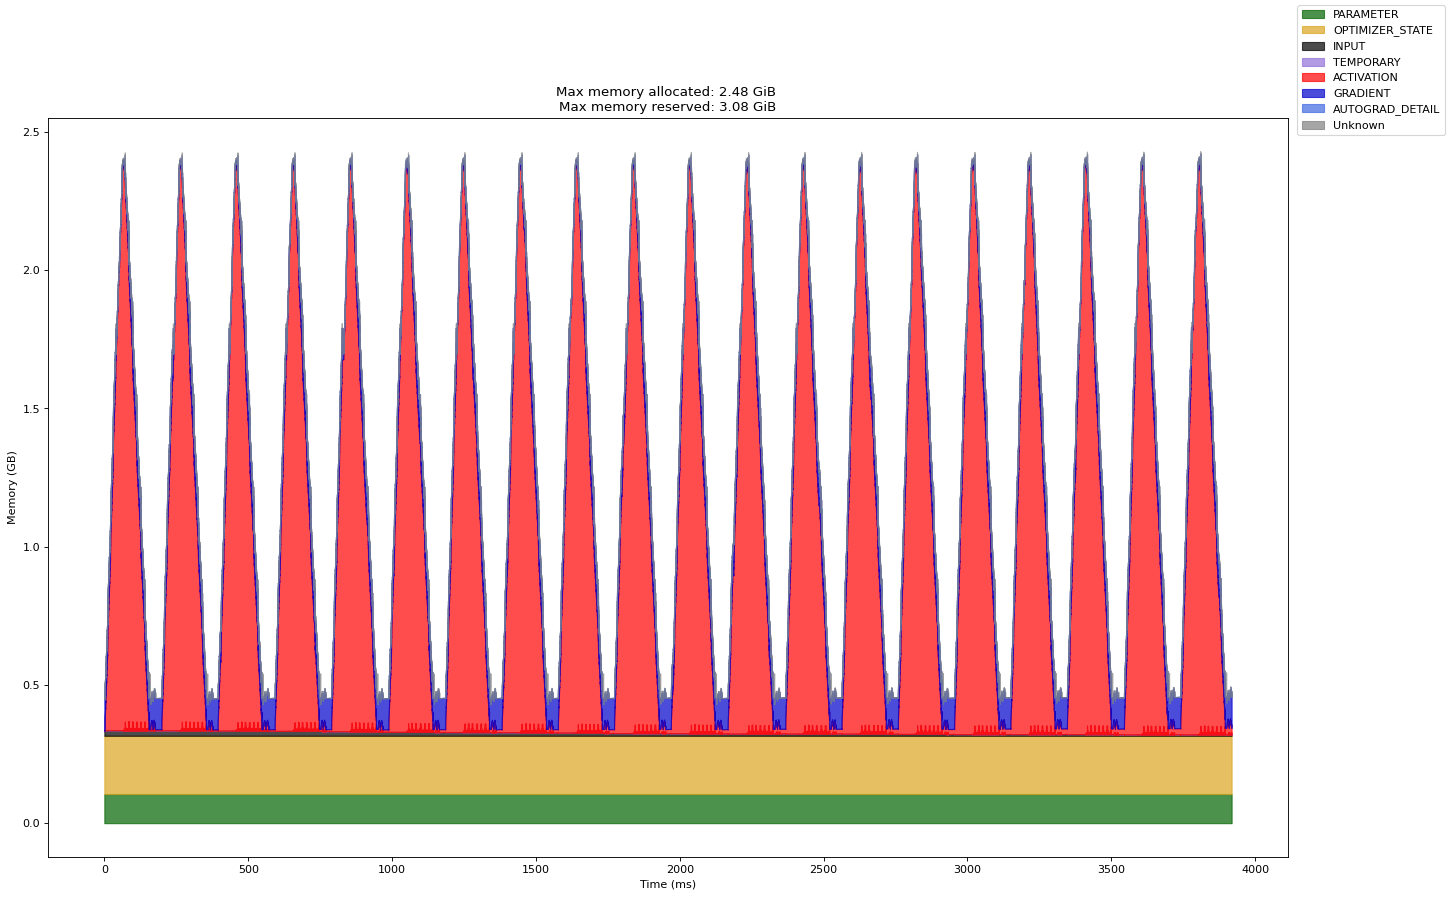

In [17]:
with torch.profiler.profile(
            activities=[
                torch.profiler.ProfilerActivity.CPU,
                torch.profiler.ProfilerActivity.CUDA,
            ],
            schedule=schedule,
            record_shapes=True,
            profile_memory=True,
            with_stack=True,          # NOTE: set to True for memory profiling, TODO: currently setting to True causes a runtime error: https://github.com/pytorch/pytorch/pull/150102
            on_trace_ready=trace_handler,
            # experimental_config = experimental_config
) as prof:

    # one epoch for now
    # for i in range(1):

    # TODO: adapt update learning rates? maybe unecessary

    # for i, data in enumerate(dataset):
    for i in range(len(dataset)):
        
        print(i)

        data = dataset[i]

        if i == 100:
            break

        # forward pass
        model(data)
        model.optimize_parameters()
        prof.step()
        

    # Construct the memory timeline HTML plot.
    prof.export_memory_timeline(f"dist_timeline.html", device="cuda:0")

    # metrics table 
    print(prof.key_averages().table(sort_by="self_cuda_memory_usage"))
